In [2]:
import pandas as pd

In [3]:
chargers = pd.read_excel('EV_Chargers_Last_updated_08-26-2024_ada (1).xlsx', sheet_name='Q4 2023')
chargers.head()

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total
0,Alameda,4,72,1590,3667,510,50,5893
1,Alpine,0,0,12,0,0,0,12
2,Amador,0,0,26,0,8,0,34
3,Butte,6,0,72,53,25,1,157
4,Calaveras,0,2,9,0,12,0,23


In [70]:
# Charging speeds
# Level 1: 5 miles of range per hour of charging
# Level 2: 25 miles of range per hour of charging
# DC Fast Charging: 300 miles of range per hour of charging
# Data from https://afdc.energy.gov/fuels/electricity-stations


In [4]:
ev = pd.read_csv('ev-zipcode-demographics.csv')
ev.head()

,ZIP,Diesel,Electric,Flex_Fuel,Gasoline,Gasoline_Hybrid,Hydrogen,Natural_Gas,PHEV,Propane,...,Total_EV,EV_perc,Median_Household_Income,Latino_perc,White_perc,Asian_perc,Black_perc,BachOrHigher_perc,Total_Population,Zillow_Home_Value_Index
0,94027,89,723,137,4764,380,1,0,167,0,...,891,14.23,250001.0,8.8,68.0,18.5,1.2,84.7,7213,7397088.91
1,94022,228,1880,255,12682,1416,8,1,502,0,...,2390,14.08,250001.0,5.2,53.7,36.2,0.2,87.6,20069,4383734.10
2,94301,141,1229,163,8513,1141,5,5,352,0,...,1586,13.73,184932.0,6.2,59.6,24.4,2.5,82.0,17243,3763337.05
3,94028,128,645,110,4451,609,1,1,188,0,...,834,13.60,250001.0,9.0,79.5,5.9,0.0,85.2,6582,3708911.26
4,94024,253,1981,246,14374,1649,12,3,571,0,...,2564,13.43,250001.0,6.3,55.6,31.7,0.9,85.1,24203,3879869.05


In [6]:
counties = pd.read_excel('zip_county.xlsx')
counties.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county
0,90001,STANDARD,0,Los Angeles,"Firestone Park, Firestone Pk",NaN,CA,Los Angeles County
1,90002,STANDARD,0,Los Angeles,Watts,NaN,CA,Los Angeles County
2,90003,STANDARD,0,Los Angeles,NaN,Broadway Manchester,CA,Los Angeles County
3,90004,STANDARD,0,Los Angeles,Oakwood,NaN,CA,Los Angeles County
4,90005,STANDARD,0,Los Angeles,Sanford,NaN,CA,Los Angeles County


In [56]:
counties = counties[['zip', 'county']]
counties.head()

,zip,county
0,90001,Los Angeles County
1,90002,Los Angeles County
2,90003,Los Angeles County
3,90004,Los Angeles County
4,90005,Los Angeles County


In [57]:
ev_total_by_zip = ev[['ZIP', 'Total_EV']]
ev_total_by_zip.head()


,ZIP,Total_EV
0,94027,891
1,94022,2390
2,94301,1586
3,94028,834
4,94024,2564


In [58]:
ev_num = pd.merge(ev_total_by_zip, counties, left_on='ZIP', right_on='zip')
ev_num.head()

ev_total = ev_num[['county', 'Total_EV']]

In [59]:
ev_total = ev_total.groupby('county').sum()
ev_total.head()

,Total_EV
county,
Alameda County,57097
Alpine County,12
Amador County,269
Butte County,1310
Calaveras County,334


In [60]:
ev_total = ev_total.reset_index()

ev_total['county'] = ev_total['county'].str[:-7]
ev_total.head()

,county,Total_EV
0,Alameda,57097
1,Alpine,12
2,Amador,269
3,Butte,1310
4,Calaveras,334


In [61]:
df = pd.merge(chargers, ev_total, left_on='County', right_on='county')
df.head()
df = df.drop(columns=['county'])
df = df.rename(columns={'Total': 'Total_chargers'})
df.head()

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total_chargers,Total_EV
0,Alameda,4,72,1590,3667,510,50,5893,57097
1,Alpine,0,0,12,0,0,0,12,12
2,Amador,0,0,26,0,8,0,34,269
3,Butte,6,0,72,53,25,1,157,1310
4,Calaveras,0,2,9,0,12,0,23,334


Simulating congestion per county

In [62]:
# Charging speeds (miles per hour)
charging_speeds = {
    "Level 1": 5,
    "Level 2": 25,
    "DC Fast Charging": 300
}

In [63]:
# # Calculate total charging capacity per type per county (sessions per day)
# df['Total_Capacity_Level_1'] = (df['Public Level 1'] + df['Shared Private Level 1']) * charging_speeds["Level 1"] * 24
# df['Total_Capacity_Level_2'] = (df['Public Level 2'] + df['Shared Private Level 2']) * charging_speeds["Level 2"] * 24
# df['Total_Capacity_DC_Fast'] = (df['Public DC Fast'] + df['Shared Private DC Fast']) * charging_speeds["DC Fast Charging"] * 24

# # Total charging capacity per county
# df['Total_Capacity'] = df['Total_Capacity_Level_1'] + df['Total_Capacity_Level_2'] + df['Total_Capacity_DC_Fast']

# # Calculate congestion ratio (EVs to total capacity)
# df['Congestion_Ratio'] = df['Total_EV'] / df['Total_Capacity']

# # Display the results
# print(df[['County', 'Total_EV', 'Total_Capacity', 'Congestion_Ratio']])

In [64]:
# Assumptions for charging sessions based on all cars being BEVs - https://www.transportation.gov/rural/ev/toolkit/ev-basics/charging-speeds 
session_durations = {
    "Level 1": 40,  # hours per session
    "Level 2": 7,  # hours per session
    "DC Fast Charging": 0.5  # hours per session
}

utilization_rate = 0.7  # 70% utilization of chargers

# Calculate total charging capacity per type per county (sessions per day)
df['Total_Capacity_Level_1'] = (df['Public Level 1'] + df['Shared Private Level 1']) * charging_speeds["Level 1"] * 24
df['Total_Capacity_Level_2'] = (df['Public Level 2'] + df['Shared Private Level 2']) * charging_speeds["Level 2"] * 24
df['Total_Capacity_DC_Fast'] = (df['Public DC Fast'] + df['Shared Private DC Fast']) * charging_speeds["DC Fast Charging"] * 24

# Total charging capacity per county
df['Total_Charger_Capacity'] = df['Total_Capacity_Level_1'] + df['Total_Capacity_Level_2'] + df['Total_Capacity_DC_Fast']

# Calculate sessions per day per type per county
df['Sessions_Level_1'] = ((24 / session_durations["Level 1"]) * 
                          (df['Public Level 1'] + df['Shared Private Level 1']) * utilization_rate)
df['Sessions_Level_2'] = ((24 / session_durations["Level 2"]) * 
                          (df['Public Level 2'] + df['Shared Private Level 2']) * utilization_rate)
df['Sessions_DC_Fast'] = ((24 / session_durations["DC Fast Charging"]) * 
                           (df['Public DC Fast'] + df['Shared Private DC Fast']) * utilization_rate)

# Total effective sessions per day per county
df['Total_Effective_Sessions'] = df['Sessions_Level_1'] + df['Sessions_Level_2'] + df['Sessions_DC_Fast']

# Calculate congestion ratio (EVs to total effective sessions)
df['Congestion_Ratio'] = df['Total_EV'] / df['Total_Effective_Sessions']

# Display the results
print(df[['County', 'Total_EV', 'Total_Effective_Sessions', 'Total_Charger_Capacity', 'Congestion_Ratio']])


             County  Total_EV  Total_Effective_Sessions  \
0           Alameda     57097                  31464.72   
1            Alpine        12                     28.80   
2            Amador       269                    331.20   
3             Butte      1310                   1176.12   
4         Calaveras       334                    425.64   
5            Colusa        67                    650.40   
6      Contra Costa     33306                  14770.44   
7         Del Norte       101                    984.00   
8         El Dorado      3552                   3206.82   
9            Fresno      7623                  12694.08   
10            Glenn        89                    206.40   
11         Humboldt      1723                   1500.00   
12         Imperial       474                    904.80   
13             Inyo       112                   2476.80   
14             Kern      4854                  13747.32   
15            Kings       632                   4560.00 

In [65]:
df['Congestion_Ratio'].describe()

count    58.000000
mean      1.165133
std       1.514159
min       0.014368
25%       0.365472
50%       0.873012
75%       1.395453
max      10.555556
Name: Congestion_Ratio, dtype: float64

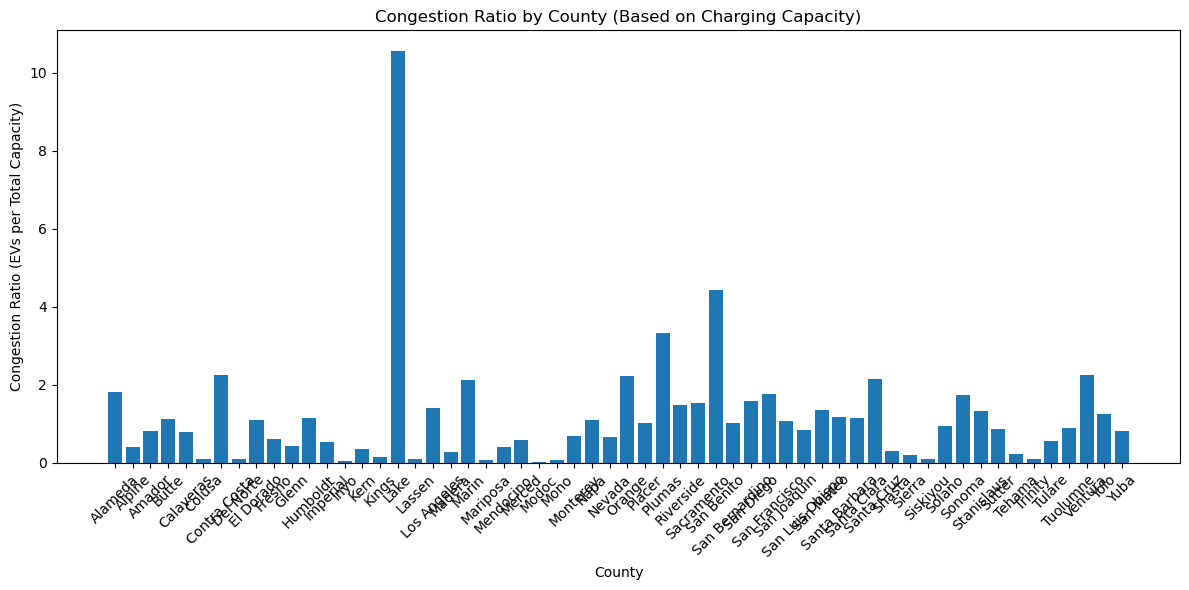

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(df['County'], df['Congestion_Ratio'])
plt.xlabel('County')
plt.ylabel('Congestion Ratio (EVs per Total Capacity)')
plt.title('Congestion Ratio by County (Based on Charging Capacity)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# Save the results to a CSV file
df.to_csv('ev_charging_congestion.csv', index=False)

In [68]:
df.head()

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total_chargers,Total_EV,Total_Capacity_Level_1,Total_Capacity_Level_2,Total_Capacity_DC_Fast,Total_Charger_Capacity,Sessions_Level_1,Sessions_Level_2,Sessions_DC_Fast,Total_Effective_Sessions,Congestion_Ratio
0,Alameda,4,72,1590,3667,510,50,5893,57097,9120,3154200,4032000,7195320,31.92,12616.8,18816.0,31464.72,1.814636
1,Alpine,0,0,12,0,0,0,12,12,0,7200,0,7200,0.00,28.8,0.0,28.80,0.416667
2,Amador,0,0,26,0,8,0,34,269,0,15600,57600,73200,0.00,62.4,268.8,331.20,0.812198
3,Butte,6,0,72,53,25,1,157,1310,720,75000,187200,262920,2.52,300.0,873.6,1176.12,1.113832
4,Calaveras,0,2,9,0,12,0,23,334,240,5400,86400,92040,0.84,21.6,403.2,425.64,0.784701
